In [1]:
from layers import Convolution, Reshape, Dense
from activation_function import Sigmoid, Softmax
from loss_functions import CategoricalCrossEntropy, BinaryCrossEntropy
from keras.datasets import mnist
from keras.utils import np_utils
import scipy
import numpy as np

2022-07-14 21:54:01.598849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 21:54:01.598881: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
network = [
    Convolution((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = np_utils.to_categorical(y_train)[:10000]
x_train = x_train.reshape(len(x_train), 1, 28, 28)[:10000]
x_train = x_train.astype("float32") / 255
y_train = y_train.reshape(len(y_train), 10, 1)


In [20]:
epochs = 20
import time
learning_rate = 0.1
error_function = BinaryCrossEntropy()
for e in range(epochs):
    error = 0
    for x, y in zip(x_train, y_train):
        output = x
        for layer in network:
            output = layer.forward(output)
        error += error_function.forward(y, output)
        back_prop = error_function.backward(y, output)
        for layer in reversed(network):
            back_prop = layer.backward(back_prop, learning_rate)
    error /= len(x_train)
    print(f"epoch:{e + 1}, error:{error}")

epoch:1, error:0.23887103063507684
epoch:2, error:0.14258136591118814
epoch:3, error:0.1170086320021895
epoch:4, error:0.10214815144990279
epoch:5, error:0.09251933253812568
epoch:6, error:0.08833338861335369
epoch:7, error:0.0815680127670015
epoch:8, error:0.07800006307952467
epoch:9, error:0.07591711367034552
epoch:10, error:0.07114023062714082
epoch:11, error:0.07057451906723716
epoch:12, error:0.06890095783612112
epoch:13, error:0.06680259796573283
epoch:14, error:0.0646076513423473
epoch:15, error:0.06453109747898118
epoch:16, error:0.06031411962473719
epoch:17, error:0.05895411557476514
epoch:18, error:0.05868971771328811
epoch:19, error:0.05690493425652855
epoch:20, error:0.05492972711876329


In [7]:
def predict(x):
    output = x
    for layer in network:
        output = layer.forward(output)
    return np.argmax(output)

4


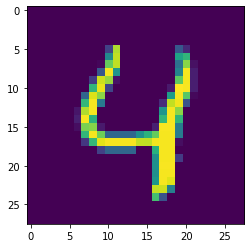

In [21]:
import matplotlib.pyplot as plt
test_x = x_test[4]
test_y = y_test[4]
result = predict(test_x.reshape(1, 28, 28))
print(result)
plt.imshow(test_x)